In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Import vaccination progress, country & population 2020 and country & GDP219 with specific columns
df_vacc_raw = pd.read_csv('data/country_vaccinations.csv', usecols=['country','iso_code','people_vaccinated_per_hundred'])
df_popu_raw = pd.read_csv('data/population_by_country_2020.csv', usecols=['Country (or dependency)','Population (2020)'], dtype={'Population (2020)':str})
df_gdp_raw = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2163564.csv', usecols=['Country Name','Country Code','2019'], dtype={'2019':str})

In [3]:
# Rename columns
df_popu_raw.rename(columns={'Country (or dependency)':'country','Population (2020)':'population'}, inplace=True)
df_gdp_raw.rename(columns={'Country Name':'country','Country Code':'iso_code','2019':'GDP2019'}, inplace=True)

In [4]:
# Reset index as country column and rename the Czechia index for merge
df_popu_raw.set_index('country', inplace=True)
df_popu_raw.rename(index={'Czech Republic (Czechia)':'Czechia'}, inplace=True)

In [5]:
# Data sorted by max value of the people_vaccinated_per_hundred and then dropped nan values
df_vacc = df_vacc_raw.groupby(['country','iso_code']).max()
df_vacc.dropna(inplace=True)

In [6]:
# Merged vaccination and country & population dataframe
vacc_pop = pd.merge(df_vacc, df_popu_raw, left_index=True, right_index=True, how='left')

# Reset the country as column of the dataframe merged vaccination and population
# merge the vaccination & population dataframe and GDP dataframe baesd on the iso_code
vacc_pop.reset_index(inplace=True)
vacc_pop_GDP = pd.merge(vacc_pop, df_gdp_raw, left_on='iso_code', right_on='iso_code', how='left')

In [7]:
# Dropped nan values
vacc_pop_GDP.dropna(inplace=True)
#vacc_pop_GDP.isnull().sum()
# Changed datatype of population and GDP2019 for analysis
vacc_pop_GDP = vacc_pop_GDP.astype({'population':'float64', 'GDP2019':'float64'})
vacc_pop_GDP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 166
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country_x                      138 non-null    object 
 1   iso_code                       138 non-null    object 
 2   people_vaccinated_per_hundred  138 non-null    float64
 3   population                     138 non-null    float64
 4   country_y                      138 non-null    object 
 5   GDP2019                        138 non-null    float64
dtypes: float64(3), object(3)
memory usage: 7.5+ KB


Text(0.5, 0, 'GDP2019')

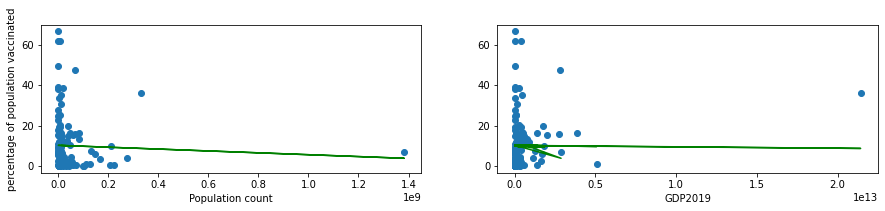

In [8]:
# variables
x = vacc_pop_GDP['population']
x1 = vacc_pop_GDP['GDP2019']
y = vacc_pop_GDP['people_vaccinated_per_hundred']

# get a line of linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)
def myfunc(x):
  return slope * x + intercept
mymodel = list(map(myfunc, x))

# draw plots
fig = plt.figure(figsize=(15,6))

plt.subplot(221)
plt.scatter(x,y)
plt.plot(x, mymodel, 'g')
plt.xlabel("Population count")
plt.ylabel("percentage of population vaccinated")

plt.subplot(222)
plt.scatter(x1,y)
plt.plot(x1, mymodel, 'g')
plt.xlabel("GDP2019")